In [20]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [63]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth // fixed.
        # print("Hi, I am an agent and I am broke!")
        print(f"Hi, I am an agent {self.unique_id} and I am broke! My current wealth is {self.wealth}")

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1
        #print(self.wealth, end = " ")

class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        # self.agents.do("say_hi")
        # self.agents.do("say_wealth")
        # shuffle_do is shuffle the order of the unique ids
        # do is just use the ordered ids
        self.agents.do("exchange")

starter_model = MoneyModel(12)
print(starter_model)
starter_model.step()

[1, 1, 3, 0, 0, 1, 0, 3, 0, 1]


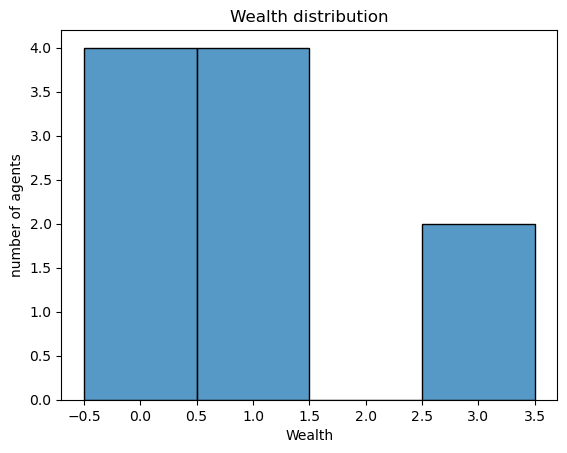

In [64]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(30):  # Runs the model for 30 steps;
    model.step()

# Note: An underscore is common convention for a variable that is not used.

agent_wealth = [a.wealth for a in model.agents]
print(agent_wealth)
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

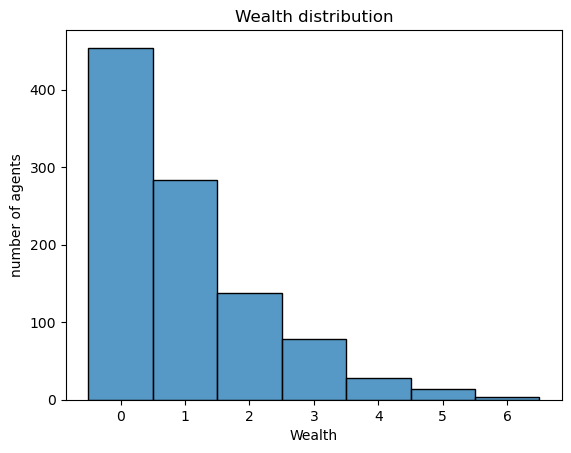

In [68]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");